In [1]:
from pyspark import  SparkContext
sc = SparkContext( 'local', 'pyspark')

In [19]:
from pyspark.sql import HiveContext
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.stat import Statistics
from math import sqrt
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

hiveContext = HiveContext(sc)

#Build a feature matrix
#data = hiveContext.sql('select worktype,eqnum,location,faildate,description from maximo_workorder')

data1 = hiveContext.sql('select leak_no,pressure,material,diameter,cause,repair_code,main_segment_no from prod_leak_repair')
data = hiveContext.sql('select leak_no,diameter,cause,repair_code,main_segment_no from prod_leak_repair')

#label.zip(scaler1.transform(features.map(lambda x: Vectors.dense(x.toArray()))))
#
#val parsedData = data.map(x => Vectors.dense(x.split(',').map(_.toDouble))).cache()

In [3]:
print data
data.count()
data.first()

DataFrame[leak_no: bigint, diameter: bigint, cause: bigint, repair_code: bigint, main_segment_no: bigint]


Row(leak_no=3122, diameter=12, cause=5, repair_code=1, main_segment_no=0)

In [4]:
parsedData = data.map(lambda x: Vectors.dense(x)).cache()

In [5]:
parsedData.count()

332333

In [6]:
summary = Statistics.colStats(parsedData)
print summary.mean()
print summary.variance()
print summary.numNonzeros()

[        nan         nan  3.24574147         nan         nan]
[       nan        nan  4.1861656        nan        nan]
[ 332333.  285035.  332333.  332333.  236125.]


In [7]:
# Convert Spark DataFrame to Pandas available in Spark 1.3.x
pandas_df = data.toPandas()

# Create a Spark DataFrame from Pandas
spark_df = hiveContext.createDataFrame(pandas_df)

print pandas_df

        leak_no  diameter  cause  repair_code  main_segment_no
0          3122        12      5            1                0
1          3123         3      5            1                0
2          3124         4      5            1          1664948
3          3125         8      5            1                0
4          3127         6      6            1            58055
5          3128         6      6            1            58055
6          3133         8      6            1            58051
7          3136         4      5            1                0
8          3142         4      6            1           213300
9          3143         4      5            1           213573
10         3147         6      6            9                0
11         3149         6      5            1            59273
12         3151         4      5            1            58089
13         3153         6      5            1            59278
14         3155         6      5            1          

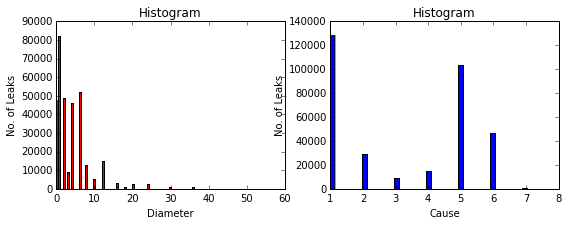

In [8]:
%matplotlib inline

x = pandas_df.diameter
y = pandas_df.cause

#fig = plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(9,3))

axes[0].hist
axes[0].set_xlabel('Diameter')
axes[0].set_ylabel('No. of Leaks')
axes[0].set_title('Histogram');

axes[1].hist(y, 50, facecolor='b')
axes[1].set_xlabel('Cause')
axes[1].set_ylabel('No. of Leaks')
axes[1].set_title('Histogram');

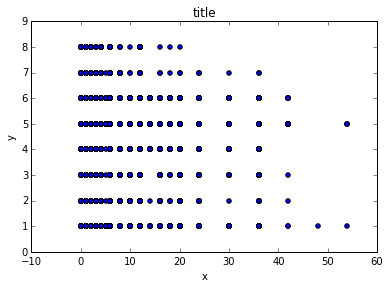

In [18]:
plt.rcParams['agg.path.chunksize']=10000-100000

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.scatter(x, y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


In [22]:
import pandas as pd 
# Convert Spark DataFrame to Pandas
pandas_df1 = data1.toPandas()

def counter(seq):
    """make a freq dict with species as key"""
    seq_dict = {}
    for n in seq:
        if n in seq_dict:
            seq_dict[n] += 1
        else:
            seq_dict[n] = 1
    return seq_dict

desc_list = pandas_df1['pressure']

spec_dict = counter(desc_list)
#lambda magic to get a sorted list from an unsorted dictionary
most_freq8 = sorted(spec_dict,key=lambda x:spec_dict[x],reverse=True)[:8]
#if you wanted to check this works
chk = spec_dict.values()
chk.sort()
chk[-8:]#show last ten values, crossref these against diction usin#g key as most freq species from most

most_freq_dict = dict(((spec,spec_dict[spec]) for spec in most_freq8)) 
most_freq_dict
###output###

hist_data = pd.DataFrame([[key,most_freq_dict[key]] for key in most_freq_dict])
hist_data
###output###

hist_data = pd.DataFrame([most_freq_dict[key] for key in most_freq_dict],columns = ['Frequency'],index=most_freq_dict.keys())
hist_data #we use the same dictionary(most_freq_dict) for columns and index, so this will work!
###Output### 

,Frequency
,119
I,48557
H,78344
M,154
L,197575
U,7358
T,136
X,87


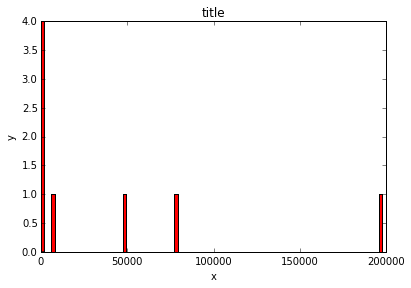

In [23]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.hist(hist_data['Frequency'].dropna(), 100, facecolor='r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [24]:
def counter(seq):
    """make a freq dict with species as key"""
    seq_dict = {}
    for n in seq:
        if n in seq_dict:
            seq_dict[n] += 1
        else:
            seq_dict[n] = 1
    return seq_dict

desc_list = pandas_df1['material']

spec_dict = counter(desc_list)
#lambda magic to get a sorted list from an unsorted dictionary
most_freq8 = sorted(spec_dict,key=lambda x:spec_dict[x],reverse=True)[:8]
#if you wanted to check this works
chk = spec_dict.values()
chk.sort()
chk[-8:]#show last ten values, crossref these against diction usin#g key as most freq species from most

most_freq_dict = dict(((spec,spec_dict[spec]) for spec in most_freq8)) 
most_freq_dict
###output###

hist_data = pd.DataFrame([[key,most_freq_dict[key]] for key in most_freq_dict])
hist_data
###output###

hist_data = pd.DataFrame([most_freq_dict[key] for key in most_freq_dict],columns = ['Frequency'],index=most_freq_dict.keys())
hist_data #we use the same dictionary(most_freq_dict) for columns and index, so this will work!
###Output### 

,Frequency
,1785
CI,129472
NA,7162
ST,5082
CU,2745
BS,123329
CS,29729
PL,31543
